In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat


In [2]:
df=pd.read_csv("datostiburon.csv", header=int(0))

In [3]:
df.head()

,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,979
1,2016,1,1,1,982
2,2016,1,1,2,948
3,2016,1,1,3,889
4,2016,1,1,4,820


In [4]:
df.apply(lambda x: sum(x.isnull()),axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
dtype: int64

In [5]:
df_clean = df.dropna()

In [6]:


df_clean.head(11)


,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,979
1,2016,1,1,1,982
2,2016,1,1,2,948
3,2016,1,1,3,889
4,2016,1,1,4,820
5,2016,1,1,5,761
6,2016,1,1,6,736
7,2016,1,1,7,757
8,2016,1,1,8,828
9,2016,1,1,9,955


In [7]:

from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [8]:
df.tail()

,anio,mes,dia,hora(utc),altura(mm),date
739,2016,1,31,19,624,2016-01-31 19:00:00
740,2016,1,31,20,622,2016-01-31 20:00:00
741,2016,1,31,21,664,2016-01-31 21:00:00
742,2016,1,31,22,753,2016-01-31 22:00:00
743,2016,1,31,23,868,2016-01-31 23:00:00


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


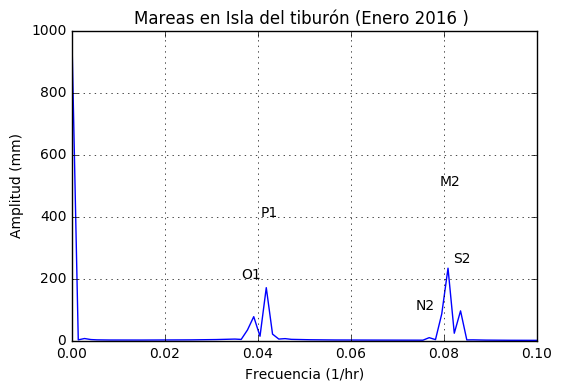

In [9]:
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 744
>>> # sample spacing
>>> T = 1
>>> x = df['date']
>>> y = df['altura(mm)']
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 1/N * np.abs(yf[0:N/2]))
plt.xlim(0,.1)
plt.ylim(0,1000)
>>> plt.grid()
plt.title(u'Mareas en Isla del tiburón (Enero 2016 ) ')  # Colocamos el título del gráfico
plt.xlabel('Frecuencia (1/hr)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Amplitud (mm)')  # Colocamos la etiqueta en el eje y

plt.text(.0405,400,"P1")
plt.text(.0365,200,"O1")
plt.text(.079,500,"M2")
plt.text(.082,250,"S2")
plt.text(.074,100,"N2")
>>> plt.show()


In [13]:
A=yf/N

In [14]:
B=np.absolute(A)
B
print(np.where(B[:,]>6))
B[B[:,]>6]

(array([  0,   2,  28,  29,  30,  31,  32,  34,  57,  59,  60,  61,  62,
       682, 683, 684, 685, 687, 710, 712, 713, 714, 715, 716, 742]),)


array([ 966.58467742,    6.3576801 ,   33.98260351,   76.87115831,
         13.69615056,  170.41779159,   20.57359332,    6.01419076,
          9.1512367 ,   85.77502322,  233.28303954,   23.4526494 ,
         95.57439256,   95.57439256,   23.4526494 ,  233.28303954,
         85.77502322,    9.1512367 ,    6.01419076,   20.57359332,
        170.41779159,   13.69615056,   76.87115831,   33.98260351,
          6.3576801 ])

In [24]:
#información sobre los picos
print( '0')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(N/2 +0),])
print('periodo=', 1/xf[int(N/2 +0),])
print('fase=',np.angle(yf[0,]))
print()
print( '2')
print('Amplitud=',np.absolute(yf[2,]/N))
print('frecuencia=', xf[int(N/2 +2),])
print('periodo=', 1/xf[int(N/2 +2),])
print('fase=',np.angle(yf[2,]))
print()
print( '28')
print('Amplitud=',np.absolute(yf[28,]/N))
print('frecuencia=', xf[int(N/2 +28),])
print('periodo=', 1/xf[int(N/2 +28),])
print('fase=',np.angle(yf[28,]))
print()
print( '29-o1')
print('Amplitud=',np.absolute(yf[29,]/N))
print('frecuencia=', xf[int(N/2 +29),])
print('periodo=', 1/xf[int(N/2 +29),])
print('fase=',np.angle(yf[29,]))
print()
print( '30-M1')
print('Amplitud=',np.absolute(yf[30,]/N))
print('frecuencia=', xf[int(N/2 +30),])
print('periodo=', 1/xf[int(N/2 +30),])
print('fase=',np.angle(yf[30,]))
print()
print( '31-s1')
print('Amplitud=',np.absolute(yf[31,]/N))
print('frecuencia=', xf[int(N/2 +31),])
print('periodo=', 1/xf[int(N/2 +31),])
print('fase=',np.angle(yf[31,]))
print()
print( '32')
print('Amplitud=',np.absolute(yf[32,]/N))
print('frecuencia=', xf[int(N/2 +32),])
print('periodo=', 1/xf[int(N/2 +32),])
print('fase=',np.angle(yf[32,]))
print()
print( '34')
print('Amplitud=',np.absolute(yf[34,]/N))
print('frecuencia=', xf[int(N/2 +34),])
print('periodo=', 1/xf[int(N/2 +34),])
print('fase=',np.angle(yf[34,]))
print()
print( '57-N2')
print('Amplitud=',np.absolute(yf[57,]/N))
print('frecuencia=', xf[int(N/2 +57),])
print('periodo=', 1/xf[int(N/2 +57),])
print('fase=',np.angle(yf[57,]))
print()
print( '59-v2')
print('Amplitud=',np.absolute(yf[59,]/N))
print('frecuencia=', xf[int(N/2 +59),])
print('periodo=', 1/xf[int(N/2 +59),])
print('fase=',np.angle(yf[59,]))
print()
print( '60-M2')
print('Amplitud=',np.absolute(yf[60,]/N))
print('frecuencia=', xf[int(N/2 +60),])
print('periodo=', 1/xf[int(N/2 +60),])
print('fase=',np.angle(yf[60,]))
print()
print( '61-L2')
print('Amplitud=',np.absolute(yf[61,]/N))
print('frecuencia=', xf[int(N/2 +61),])
print('periodo=', 1/xf[int(N/2 +61),])
print('fase=',np.angle(yf[61,]))
print()
print( '62-S2')
print('Amplitud=',np.absolute(yf[62,]/N))
print('frecuencia=', xf[int(N/2 +62),])
print('periodo=', 1/xf[int(N/2 +62),])
print('fase=',np.angle(yf[62,]))
print()


0
Amplitud= 966.584677419
frecuencia= 0.0
periodo= inf
fase= 0.0

2
Amplitud= 6.35768010379
frecuencia= 0.00268817204301
periodo= 372.0
fase= -1.04335203345

28
Amplitud= 33.9826035066
frecuencia= 0.0376344086022
periodo= 26.5714285714
fase= -3.07088947874

29-o1
Amplitud= 76.8711583064
frecuencia= 0.0389784946237
periodo= 25.6551724138
fase= -0.0572967362297

30-M1
Amplitud= 13.6961505638
frecuencia= 0.0403225806452
periodo= 24.8
fase= -0.345620948844

31-s1
Amplitud= 170.417791592
frecuencia= 0.0416666666667
periodo= 24.0
fase= -2.93737769773

32
Amplitud= 20.5735933152
frecuencia= 0.0430107526882
periodo= 23.25
fase= 0.398857288425

34
Amplitud= 6.01419075631
frecuencia= 0.0456989247312
periodo= 21.8823529412
fase= 0.619611710152

57-N2
Amplitud= 9.15123669533
frecuencia= 0.0766129032258
periodo= 13.0526315789
fase= 0.332259666872

59-v2
Amplitud= 85.7750232196
frecuencia= 0.0793010752688
periodo= 12.6101694915
fase= 2.42411001119

60-M2
Amplitud= 233.28303954
frecuencia= 0.08064516

In [29]:
#nombrar los datos como variables

#Amplitud
A0 = np.absolute(yf[int(0),]/N)
A1= 2*np.absolute(yf[2,]/N)
A2= 2*np.absolute(yf[28,]/N)
A3= 2*np.absolute(yf[29,]/N)
A4= 2*np.absolute(yf[30,]/N)
A5= 2*np.absolute(yf[31,]/N)
A6= 2*np.absolute(yf[32,]/N)
A7= 2*np.absolute(yf[34,]/N)
A8= 2*np.absolute(yf[57,]/N)
A9= 2*np.absolute(yf[59,]/N)
A10= 2*np.absolute(yf[60,]/N)
A11= 2*np.absolute(yf[61,]/N)
A12= 2*np.absolute(yf[62,]/N)

#Frecuencia

f1= xf[int(N/2 +2),]
f2= xf[int(N/2 +28),]
f3= xf[int(N/2 +29),]
f4= xf[int(N/2 +30),]
f5= xf[int(N/2 +31),]
f6= xf[int(N/2 +32),]
f7= xf[int(N/2 +34),]
f8= xf[int(N/2 +57),]
f9= xf[int(N/2 +59),]
f10= xf[int(N/2 +60),]
f11= xf[int(N/2 +61),]
f12= xf[int(N/2 +62),]


#Fases

O1= np.angle(yf[2,])
O2= np.angle(yf[28,])
O3= np.angle(yf[29,])
O4= np.angle(yf[30,])
O5= np.angle(yf[31,])
O6= np.angle(yf[32,])
O7= np.angle(yf[34,])
O8= np.angle(yf[57,])
O9= np.angle(yf[59,])
O10= np.angle(yf[60,])
O11= np.angle(yf[61,])
O12= np.angle(yf[62,])


In [53]:


y= df['altura(mm)']
w= 2.0*np.pi
a=0
def f(t):
    return A0+ (A1*np.cos(w*f1*t+O1) + A2*np.cos(w*f2 *t+O2) 
                   + A3*np.cos(w*f3*t+O3) + A4*np.cos(w*f4*t + O4)
                   + A5*np.cos(w*f5*t+O5)+ A6*np.cos(w*f6*t+O6)+ A7*np.cos(w*f7*t+O7)+ A8*np.cos(w*f8*t+O8)
                   + A9*np.cos(w*f9*t+O9)+ A10*np.cos(w*f10*t+O10)+ A11*np.cos(w*f11*t+O11)+ A12*np.cos(w*f12*t+O12))



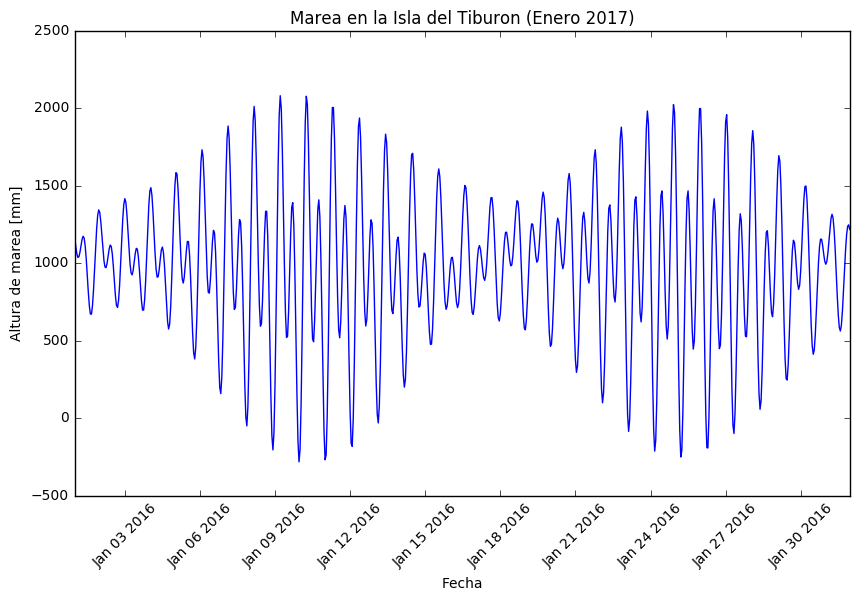

In [80]:

plt.plot(df['date'], f(df['T']), label='Reconstrucción')
plt.ylabel('Altura de marea [mm]')
plt.xlabel('Fecha')
plt.title('Marea en la Isla del Tiburon (Enero 2017)')


locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


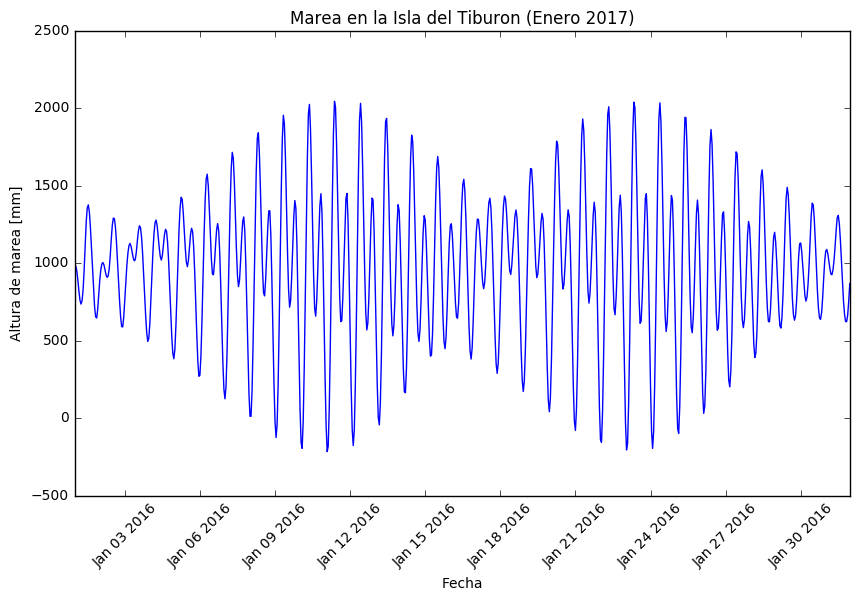

In [78]:
plt.plot(df[u'date'], df['altura(mm)'], label ="CICESE")

plt.ylabel('Altura de marea [mm]')
plt.xlabel('Fecha')
plt.title('Marea en la Isla del Tiburon (Enero 2017)')


locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


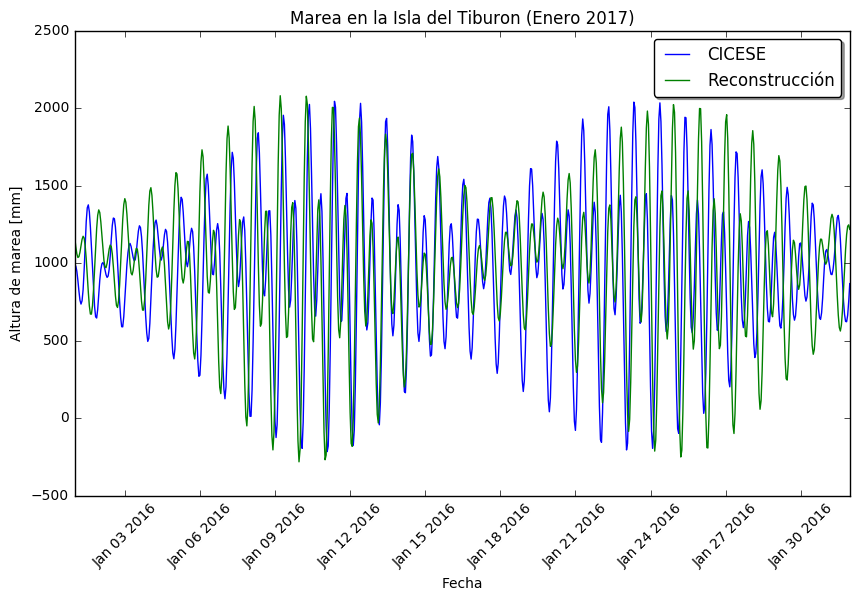

In [79]:
plt.plot(df[u'date'], df['altura(mm)'], label ="CICESE")
plt.plot(df['date'], f(df['T']), label='Reconstrucción')
plt.ylabel('Altura de marea [mm]')
plt.xlabel('Fecha')
plt.title('Marea en la Isla del Tiburon (Enero 2017)')

plt.legend(fancybox=True, shadow=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()



In [73]:
y=df['altura(mm)']
y1=f(df['T'])

In [76]:
print('Error relativo=',sum(abs(y-y1)**2) / sum(abs(y)**2))

Error relativo= 0.24355404710628528
